In [ ]:
pip uninstall numpy

In [ ]:
pip install numpy

In [2]:
import numpy as np
import os
import pandas as pd
from mtcnn import MTCNN

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [7]:
import os
import numpy as np
import cv2
from mtcnn import MTCNN
import os
import matplotlib.pyplot as plt
from pathlib import Path

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [197]:
from keras.models import load_model
import numpy as np
from PIL import Image
from keras.applications.resnet50 import preprocess_input

In [198]:
def extract_frames(video_path, frame_skip=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_skip == 0:
            frames.append(frame)
        frame_count += 1
    cap.release()
    return frames

# Ví dụ sử dụng
video_path = r"C:\DL\NDKM\video\HaAnhTuan.mp4"
frames = extract_frames(video_path)
print(f"Đã trích xuất {len(frames)} frames từ video.")


Đã trích xuất 551 frames từ video.


In [119]:
import cv2
from mtcnn import MTCNN
import os

# Khởi tạo bộ phát hiện khuôn mặt MTCNN
detector = MTCNN()

def extract_faces(frame, frame_index, output_folder, max_faces=120):
    """
    Trích xuất các khuôn mặt từ một khung hình và lưu vào thư mục.
    Args:
        frame: Khung hình đầu vào
        frame_index: Chỉ số của khung hình
        output_folder: Thư mục để lưu các khuôn mặt
        max_faces: Số lượng khuôn mặt tối đa cần trích xuất
    """
    results = detector.detect_faces(frame)
    face_count = 0
    extracted_faces = 0  # Số lượng khuôn mặt đã trích xuất

    for result in results:
        if extracted_faces >= max_faces:  # Dừng nếu đã trích xuất đủ số lượng khuôn mặt
            break
        
        x, y, width, height = result['box']
        x, y = max(0, x), max(0, y)  # Đảm bảo tọa độ không âm
        cropped_face = frame[y:y + height, x:x + width]

        # Lưu khuôn mặt vào file với tên theo chỉ số khuôn mặt và khung hình
        face_path = os.path.join(output_folder, f"HoNgocHa8{frame_index}_face_{face_count}.jpg")
        cv2.imwrite(face_path, cropped_face)
        face_count += 1
        extracted_faces += 1

    return extracted_faces

# Đường dẫn tới video
video_path = r"C:\DL\NDKM\video\hongocha8.mp4" 

# Tạo thư mục để lưu các khuôn mặt (Nếu chưa có)
output_folder = "HoNgocHa"
os.makedirs(output_folder, exist_ok=True)

# Mở video
cap = cv2.VideoCapture(video_path)

# Kiểm tra xem video có mở thành công không
if not cap.isOpened():
    print("Không thể mở video. Kiểm tra lại đường dẫn.")
else:
    frame_index = 0
    total_faces = 0
    while True:
        # Đọc từng khung hình từ video
        ret, frame = cap.read()
        if not ret:
            print("Đã xử lý xong video hoặc không thể đọc thêm khung hình.")
            break

        frame_index += 1
        # Trích xuất khuôn mặt từ mỗi khung hình (chỉ lấy mỗi 10 khung hình để tối ưu)
        if frame_index % 10 == 0:
            faces_extracted = extract_faces(frame, frame_index, output_folder, max_faces=120)
            total_faces += faces_extracted
            print(f"Đã trích xuất {faces_extracted} khuôn mặt từ khung hình {frame_index}.")

            if total_faces >= 50:
                print("Đã trích xuất đủ 50 khuôn mặt.")
                break

    print(f"Tổng số khuôn mặt được trích xuất: {total_faces}")

# Giải phóng đối tượng VideoCapture
cap.release()


1/1 [==============================] - 0s 211ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 10.
1/1 [==============================] - 0s 30ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 20.
1/1 [==============================] - 0s 41ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 30.
1/1 [==============================] - 0s 38ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 40.
1/1 [==============================] - 0s 31ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 50.
1/1 [==============================] - 0s 31ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 60.
1/1 [==============================] - 0s 31ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 70.
1/1 [==============================] - 0s 33ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 80.
1/1 [==============================] - 0s 38ms/step
Đã trích xuất 2 khuôn mặt từ khung hình 90.
1/1 [==============================] - 0s 43ms/step
Đã trích xuất 1 khuôn mặt từ khung hình 100.
1/1 [==============================] -

In [200]:
import os

def extract_labels_from_folders(dataset_path):
    labels = {}
    total_images = 0  # Biến đếm tổng số hình ảnh
    
    # Lặp qua từng thư mục trong đường dẫn dataset
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        
        # Kiểm tra xem có phải là thư mục không
        if os.path.isdir(folder_path):
            # Lấy danh sách các file ảnh trong thư mục
            images = [img for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
            labels[folder_name] = images  # Gán tên thư mục làm label và danh sách ảnh
            total_images += len(images)  # Cộng dồn số hình ảnh
            
    return labels, total_images

# Đường dẫn tới dataset
dataset_path = r'C:\DL\NDKM\dataset'  # Thay đổi đường dẫn này cho phù hợp
labels, total_images = extract_labels_from_folders(dataset_path)

# In ra kết quả
for label, images in labels.items():
    print(f"Label: {label}, Images: {len(images)}")

# In ra tổng số hình ảnh
print(f"Tổng số hình ảnh: {total_images}")

Label: DoMixi, Images: 301
Label: HariWon, Images: 302
Label: HieuThuHai, Images: 307
Label: HoNgocHa, Images: 310
Label: karik, Images: 355
Label: MisThy, Images: 321
Label: PhuongAnhDao, Images: 336
Label: SonTungMTP, Images: 312
Label: ThuyTien, Images: 320
Label: TranThanh, Images: 312
Tổng số hình ảnh: 3176


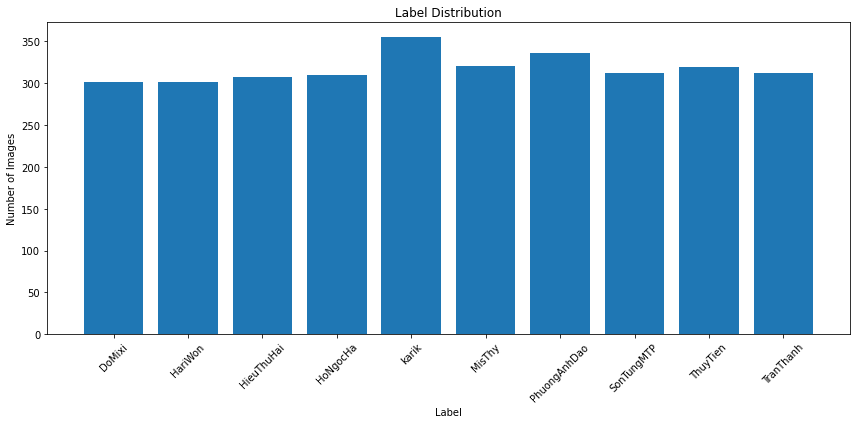

In [201]:
import matplotlib.pyplot as plt

# Tính số lượng hình ảnh trong mỗi nhãn
label_counts = [len(images) for images in labels.values()]

# Tạo biểu đồ cột để trực quan hóa phân phối nhãn
plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước biểu đồ
plt.bar(labels.keys(), label_counts)
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Label Distribution')
plt.xticks(rotation=45)  # Xoay nhãn trên trục x để dễ đọc
plt.tight_layout()  # Tự động điều chỉnh kích thước để không bị cắt
plt.show()

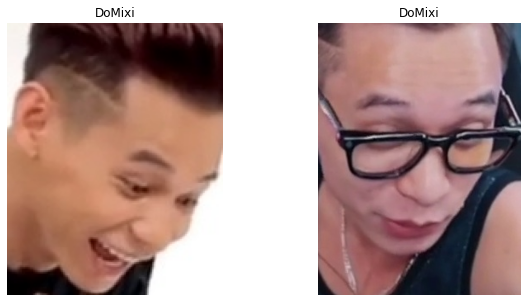

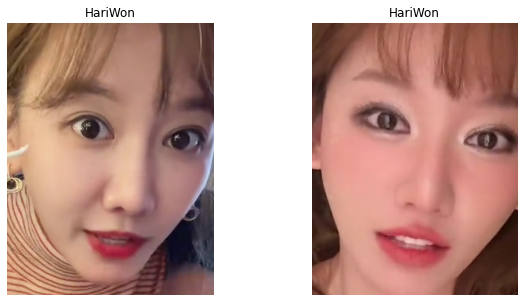

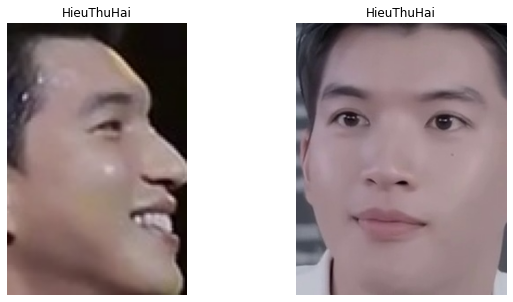

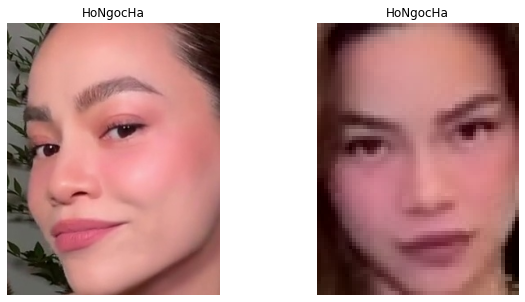

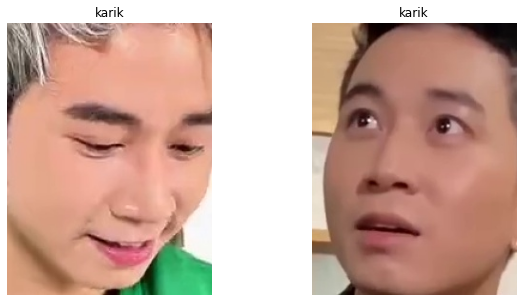

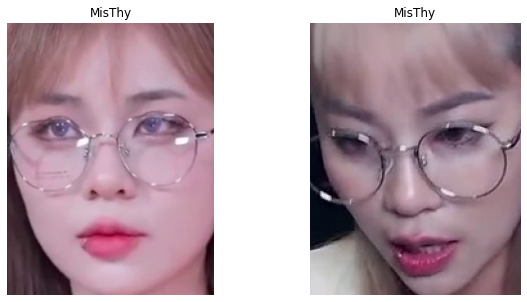

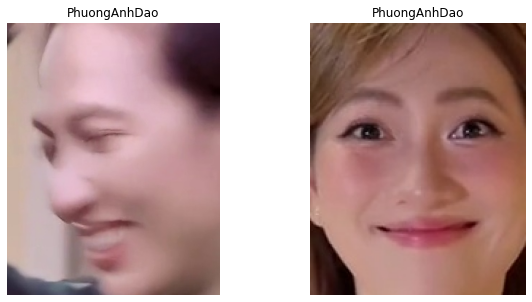

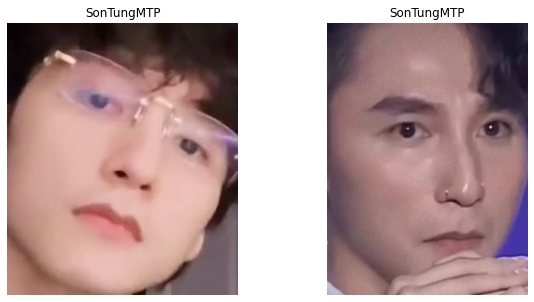

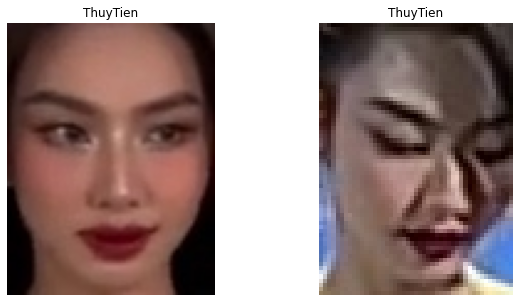

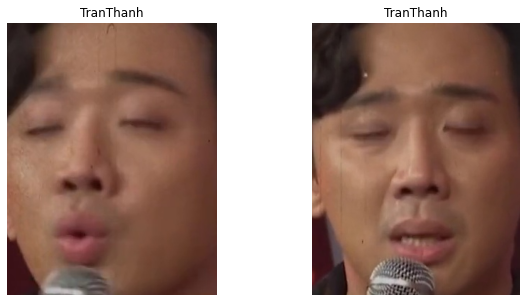

In [202]:
# Danh sách các nhãn
class_names = [
    'DoMixi', 
    'HariWon', 
    'HieuThuHai', 
    'HoNgocHa', 
    'karik', 
    'MisThy', 
    'PhuongAnhDao', 
    'SonTungMTP', 
    'ThuyTien', 
    'TranThanh'
]

# Hàm để hiển thị hình ảnh màu ngẫu nhiên
def display_random_color_images(dataset_path):
    for label in class_names:
        folder_path = os.path.join(dataset_path, label)
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue
        
        image_files = os.listdir(folder_path)
        if len(image_files) < 2:
            print(f"Not enough images in folder: {folder_path}")
            continue

        # Chọn ngẫu nhiên 2 hình ảnh
        selected_images = random.sample(image_files, 2)
        images = []
        titles = []

        for image_name in selected_images:
            image_path = os.path.join(folder_path, image_name)
            # Đọc hình ảnh
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
                titles.append(label)

        # Hiển thị hình ảnh
        plt.figure(figsize=(10, 5))
        for i in range(len(images)):
            plt.subplot(1, 2, i + 1)  # 1 hàng, 2 cột
            plt.imshow(images[i])  # Hiển thị hình ảnh màu gốc
            plt.title(titles[i])  # Hiển thị nhãn
            plt.axis('off')  # Tắt trục

        plt.show()  # Hiển thị tất cả hình ảnh

# Đường dẫn tới dataset
dataset_path = r'C:\DL\NDKM\dataset'  # Thay đổi đường dẫn này cho phù hợp
display_random_color_images(dataset_path)

In [203]:
import os
import pandas as pd

def extract_labels_from_folders(dataset_path):
    labels = []

    # Lặp qua từng thư mục trong đường dẫn dataset
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        # Kiểm tra xem có phải là thư mục không
        if os.path.isdir(folder_path):
            # Lấy danh sách các file ảnh trong thư mục
            images = [img for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
            for img in images:
                labels.append({'label': folder_name, 'image_url': os.path.join(folder_path, img)})

    return pd.DataFrame(labels)

# Đường dẫn tới dataset
dataset_path = r'C:\DL\NDKM\dataset'  # Thay đổi đường dẫn này cho phù hợp
df = extract_labels_from_folders(dataset_path)

# Lưu DataFrame vào file CSV
df.to_csv('labels_and_images.csv', index=False)

# In ra kết quả
print(df.head())  # Hiển thị 5 dòng đầu tiên của DataFrame

    label                                          image_url
0  DoMixi  C:\DL\NDKM\dataset\DoMixi\DoMixi10_150_face_0.jpg
1  DoMixi  C:\DL\NDKM\dataset\DoMixi\DoMixi10_160_face_0.jpg
2  DoMixi  C:\DL\NDKM\dataset\DoMixi\DoMixi10_170_face_0.jpg
3  DoMixi  C:\DL\NDKM\dataset\DoMixi\DoMixi10_180_face_0.jpg
4  DoMixi  C:\DL\NDKM\dataset\DoMixi\DoMixi10_190_face_0.jpg


In [2]:
pip install --upgrade numpy 

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [212]:
from sklearn.model_selection import train_test_split

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9500\3699938484.py", line 1, in <cell line: 1>
    from sklearn.model_selection import train_test_split
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\__init__.py", line 84, in <module>
    from .base import clone
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 18, in <module>
    from .exceptions import InconsistentVersionWarning
ImportError: cannot import name 'InconsistentVersionWarning' from 'sklearn.exceptions' (c:\ProgramData\Anaconda3\lib\site-packages\sklearn\exceptions.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1982, in showtraceback
    s

In [179]:
# Định nghĩa kích thước hình ảnh
IMG_SIZE = (224, 224)

# Danh sách các nhãn
class_names = [
    'DoMixi', 
    'HariWon', 
    'HieuThuHai', 
    'HoNgocHa', 
    'karik', 
    'MisThy', 
    'PhuongAnhDao', 
    'SonTungMTP', 
    'ThuyTien', 
    'TranThanh'
]

# Hàm để chuyển đổi hình ảnh sang xám và thay đổi kích thước
def convert_images_to_gray_and_resize(dataset_path, save_path):
    for label in class_names:
        folder_path = os.path.join(dataset_path, label)
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue
        
        image_files = os.listdir(folder_path)
        if len(image_files) < 1:
            print(f"No images in folder: {folder_path}")
            continue

        # Tạo thư mục cho nhãn nếu chưa tồn tại
        label_save_path = os.path.join(save_path, label)
        os.makedirs(label_save_path, exist_ok=True)

        for image_name in image_files:
            image_path = os.path.join(folder_path, image_name)
            # Đọc hình ảnh
            image = cv2.imread(image_path)
            if image is not None:
                # Resize hình ảnh
                image = cv2.resize(image, IMG_SIZE)
                # Chuyển đổi hình ảnh sang màu xám
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Lưu hình ảnh xám vào thư mục tương ứng với nhãn
                gray_image_path = os.path.join(label_save_path, image_name)
                cv2.imwrite(gray_image_path, gray_image)

# Đường dẫn tới dataset và thư mục lưu ảnh xám
dataset_path = r'C:\DL\NDKM\dataset'  # Thay đổi đường dẫn này cho phù hợp
save_path = r'C:\DL\NDKM\gray_images'  # Thay đổi đường dẫn này cho phù hợp
os.makedirs(save_path, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại

# Gọi hàm chuyển đổi
convert_images_to_gray_and_resize(dataset_path, save_path)

print("Chuyển đổi hoàn tất!")

Chuyển đổi hoàn tất!


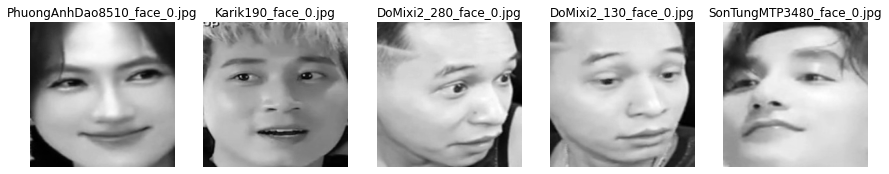

In [182]:
import random
import matplotlib.pyplot as plt
import os
import cv2

def display_random_gray_images_from_all_labels(save_path, num_images=5):
    all_gray_images = []
    
    # Lấy tất cả các ảnh từ tất cả các nhãn
    for label in class_names:
        label_save_path = os.path.join(save_path, label)
        if os.path.exists(label_save_path):
            images = os.listdir(label_save_path)
            for image_name in images:
                all_gray_images.append(os.path.join(label_save_path, image_name))

    # Kiểm tra có đủ ảnh để hiển thị
    if len(all_gray_images) < num_images:
        print(f"Không đủ ảnh để hiển thị. Có {len(all_gray_images)} ảnh trong tổng số.")
        num_images = len(all_gray_images)

    # Chọn ngẫu nhiên ảnh
    random_images = random.sample(all_gray_images, num_images)

    # Hiển thị ảnh
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(random_images):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh xám
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.show()

# Gọi hàm để hiển thị ảnh xám ngẫu nhiên từ tất cả các nhãn
display_random_gray_images_from_all_labels(save_path)

In [193]:
import os
import cv2
import numpy as np

def augment_and_save_gray_images(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    total_images = 0
    total_augmented_images = 0

    for label in os.listdir(input_folder):
        label_path = os.path.join(input_folder, label)
        if not os.path.isdir(label_path):
            continue

        output_label_path = os.path.join(output_folder, label)
        os.makedirs(output_label_path, exist_ok=True)

        for filename in os.listdir(label_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(label_path, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                if image is None:
                    print(f"Không thể đọc ảnh: {filename}")
                    continue

                total_images += 1

                augmented_images = []

                # 1. Xoay ảnh
                for angle in [90, 180, 270]:
                    M = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1)
                    rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
                    augmented_images.append(rotated_image)

                # 2. Lật ảnh
                flipped_image = cv2.flip(image, 1)
                augmented_images.append(flipped_image)

                # 3. Thêm nhiễu
                noise = np.random.randint(0, 25, image.shape, dtype='uint8')
                noisy_image = cv2.add(image, noise)
                augmented_images.append(noisy_image)

                # Lưu các ảnh đã tăng cường
                for i, aug_image in enumerate(augmented_images):
                    output_filename = f"{label}_{os.path.splitext(filename)[0]}_aug_{i}.png"
                    output_path = os.path.join(output_label_path, output_filename)
                    cv2.imwrite(output_path, aug_image)

                total_augmented_images += len(augmented_images)
                print(f"Đã tăng cường và lưu {len(augmented_images)} ảnh từ: {filename}")

            else:
                print(f"Đã bỏ qua tệp không phải ảnh: {filename}")

    print(f"Tổng số ảnh gốc: {total_images}")
    print(f"Tổng số ảnh đã tăng cường: {total_augmented_images}")
    print("Tăng cường dữ liệu hoàn tất.")

# Đường dẫn đến thư mục chứa ảnh gốc và thư mục lưu ảnh đã tăng cường
input_folder = r'C:\DL\NDKM\gray_images'  # Thư mục chứa ảnh gốc
output_folder = r'C:\DL\NDKM\aug_data'    # Thư mục lưu ảnh đã tăng cường

# Gọi hàm tăng cường và lưu ảnh
augment_and_save_gray_images(input_folder, output_folder)

Đã tăng cường và lưu 5 ảnh từ: DoMixi10_150_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_160_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_170_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_180_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_190_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_200_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_210_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_220_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_230_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_240_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_250_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_260_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_270_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_280_face_1.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_290_face_1.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_300_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_310_face_0.jpg
Đã tăng cường và lưu 5 ảnh từ: DoMixi10_320_face_0.jpg
Đã tăng cư

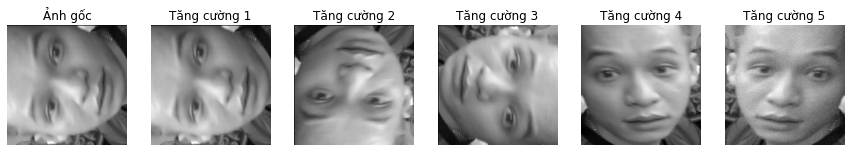

In [195]:
def show_augmented_images(augmented_folder):
    """
    Hiển thị ảnh gốc cùng với 5 loại ảnh đã tăng cường.

    Args:
        augmented_folder (str): Đường dẫn thư mục chứa ảnh đã tăng cường.
    """
    for label in os.listdir(augmented_folder):
        label_path = os.path.join(augmented_folder, label)
        if not os.path.isdir(label_path):
            continue

        # Lấy danh sách các ảnh đã tăng cường
        augmented_images = [f for f in os.listdir(label_path) if f.endswith('.png') or f.endswith('.jpg')]
        
        # Chọn 5 ảnh tăng cường đầu tiên
        selected_images = augmented_images[:5]

        # Hiển thị ảnh gốc
        original_image_path = os.path.join(label_path, selected_images[0])  # Giả sử ảnh gốc có cùng tên với ảnh đầu tiên
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 6, 1)
        plt.imshow(original_image, cmap='gray')
        plt.title('Ảnh gốc')
        plt.axis('off')

        # Hiển thị các ảnh đã tăng cường
        for i, img_name in enumerate(selected_images):
            augmented_image_path = os.path.join(label_path, img_name)
            augmented_image = cv2.imread(augmented_image_path, cv2.IMREAD_GRAYSCALE)

            plt.subplot(1, 6, i + 2)
            plt.imshow(augmented_image, cmap='gray')
            plt.title(f'Tăng cường {i + 1}')
            plt.axis('off')

        plt.show()
        break  # Chỉ hiển thị ảnh cho nhãn đầu tiên

# Đường dẫn đến thư mục chứa ảnh đã tăng cường
augmented_folder = r'C:\DL\NDKM\aug_data'  # Thư mục chứa ảnh đã tăng cường

# Gọi hàm để hiển thị ảnh
show_augmented_images(augmented_folder)